<a href="https://colab.research.google.com/github/joshred83/cda_project/blob/main/ainet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LassoCV
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import sparse
from sklearn.metrics import r2_score
import numpy as np

In [51]:
df = pd.read_csv("https://ai-jobs.net/salaries/download/salaries.csv")

In [52]:
ds_titles = [
    "AI Architect",
    "AI Developer",
    "AI Engineer",
    "AI Product Manager",
    "AI Programmer",
    "AI Research Engineer",
    "AI Scientist",
    "Analytics Engineer",
    "Analytics Engineering Manager",
    "Applied Data Scientist",
    "Applied Machine Learning Engineer",
    "Applied Machine Learning Scientist",
    "Data Analytics Consultant",
    "Data Analytics Engineer",
    "Data Analytics Lead",
    "Data Analytics Manager",
    "Data Analytics Specialist",
    "Data Engineer",
    "Data Modeler",
    "Data Modeller",
    "Data Science",
    "Data Science Consultant",
    "Data Science Director",
    "Data Science Engineer",
    "Data Science Lead",
    "Data Science Manager",
    "Data Science Practitioner",
    "Data Science Tech Lead",
    "Data Scientist",
    "Data Scientist Lead",
    "Data Visualization Analyst",
    "Data Visualization Engineer",
    "Data Visualization Specialist",
    "Decision Scientist",
    "Deep Learning Engineer",
    "Deep Learning Researcher",
    "Director of Data Science",
    "Head of Data Science",
    "Head of Machine Learning",
    "Insight Analyst",
    "Lead Data Scientist",
    "Lead Machine Learning Engineer",
    "Machine Learning Developer",
    "Machine Learning Engineer",
    "Machine Learning Infrastructure Engineer",
    "Machine Learning Manager",
    "Machine Learning Modeler",
    "Machine Learning Operations Engineer",
    "Machine Learning Research Engineer",
    "Machine Learning Researcher",
    "Machine Learning Scientist",
    "Machine Learning Software Engineer",
    "Machine Learning Specialist",
    "Manager Data Management",
    "Managing Director Data Science",
    "ML Engineer",
    "MLOps Engineer",
    "NLP Engineer",
    "Principal Data Scientist",
    "Principal Machine Learning Engineer",
    "Prompt Engineer",
    "Research Scientist",
]
ds_titles = []
pd.options.display.max_rows = 10000
df[~df.job_title.isin(ds_titles)].job_title.value_counts().to_clipboard()

In [53]:
for col in df.select_dtypes("object"):
  print(col)
  display(df[col].unique())


experience_level


array(['SE', 'MI', 'EN', 'EX'], dtype=object)

employment_type


array(['FT', 'CT', 'PT', 'FL'], dtype=object)

job_title


array(['AI Software Development Engineer', 'Data Manager',
       'Data Engineer', 'Data Analyst', 'Data Science',
       'Business Intelligence', 'Data Scientist',
       'Master Data Specialist', 'Machine Learning Engineer',
       'Data Analytics Manager', 'Research Scientist',
       'Research Engineer', 'Research Analyst', 'Data Architect',
       'Business Intelligence Engineer', 'Robotics Engineer',
       'Machine Learning Modeler', 'AI Engineer', 'ML Engineer',
       'NLP Engineer', 'Applied Scientist', 'Data Operations Manager',
       'Data Science Manager', 'Data Modeler',
       'Data Integration Specialist', 'Data Product Manager',
       'Data Visualization Specialist', 'Data Specialist',
       'Business Intelligence Lead', 'Business Intelligence Analyst',
       'AI Software Engineer', 'Machine Learning Scientist',
       'Data Science Engineer', 'Machine Learning Operations Engineer',
       'Analytics Engineer', 'Data Management Analyst',
       'Encounter Data Mana

salary_currency


array(['INR', 'USD', 'GBP', 'CAD', 'EUR', 'DKK', 'ILS', 'BRL', 'CHF',
       'NZD', 'AUD', 'PLN', 'PHP', 'TRY', 'NOK', 'JPY', 'ZAR', 'HKD',
       'SGD', 'THB', 'HUF', 'MXN', 'CLP'], dtype=object)

employee_residence


array(['IN', 'US', 'GB', 'CA', 'AU', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ',
       'AR', 'ES', 'KE', 'LV', 'GE', 'DE', 'IL', 'FI', 'AT', 'HR', 'BR',
       'CH', 'AE', 'GR', 'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX',
       'PT', 'BA', 'IT', 'IE', 'EE', 'MT', 'LB', 'RO', 'HU', 'VN', 'NG',
       'CZ', 'PK', 'UG', 'CO', 'SI', 'MU', 'AM', 'TH', 'KR', 'QA', 'RU',
       'TN', 'GH', 'BE', 'AD', 'EC', 'PE', 'MD', 'NO', 'UZ', 'JP', 'HK',
       'CF', 'SG', 'SE', 'KW', 'CY', 'IR', 'AS', 'CN', 'CR', 'CL', 'PR',
       'BO', 'DO', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'LU'],
      dtype=object)

company_location


array(['IN', 'US', 'GB', 'CA', 'AU', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ',
       'AR', 'ES', 'KE', 'LV', 'DE', 'IL', 'FI', 'AT', 'BR', 'CH', 'AE',
       'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX', 'PT', 'BA', 'IT',
       'AS', 'IE', 'EE', 'MT', 'HU', 'LB', 'RO', 'VN', 'NG', 'LU', 'GI',
       'CO', 'SI', 'GR', 'MU', 'RU', 'KR', 'CZ', 'QA', 'GH', 'SE', 'AD',
       'EC', 'NO', 'JP', 'HK', 'CF', 'SG', 'TH', 'HR', 'AM', 'PK', 'IR',
       'BS', 'PR', 'BE', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'CN', 'CL', 'MD'],
      dtype=object)

company_size


array(['L', 'M', 'S'], dtype=object)

In [54]:
df = df.loc[
    df["salary_currency"].eq("USD")
    & df["employee_residence"].eq("US")
    # & df.job_title.isin(ds_titles)
    ,    [
        "work_year",
        "salary",
        "job_title",
        "employment_type",
        "remote_ratio",
        "experience_level",
        "company_size",
    ],
]
y = df["salary"]
del df["salary"]

In [55]:
# prompt: Using dataframe df: create a transformation pipeline. Encode the variables employment type, experience level, expertise level and company size.  rewrite this to reflect changes to the data frame

from sklearn.preprocessing import OneHotEncoder


# Create a OneHotEncoder object
ohe = OneHotEncoder(drop=None, sparse_output=True)
cvect = CountVectorizer()
df_ohe = ohe.fit_transform(df[['employment_type', 'experience_level', 'company_size']])
df_cvect = cvect.fit_transform(df["job_title"])
ohe_shape = df_ohe.shape
cvect_shape = df_cvect.shape

X = sparse.hstack([df_ohe, df_cvect])


In [56]:
lasso = LassoCV(cv=10, n_jobs=-1, alphas=np.linspace(10, 50, 1000))

lasso.fit(X=X, y = y.values.ravel())

LassoCV(alphas=array([10.        , 10.04004004, 10.08008008, 10.12012012, 10.16016016,
       10.2002002 , 10.24024024, 10.28028028, 10.32032032, 10.36036036,
       10.4004004 , 10.44044044, 10.48048048, 10.52052052, 10.56056056,
       10.6006006 , 10.64064064, 10.68068068, 10.72072072, 10.76076076,
       10.8008008 , 10.84084084, 10.88088088, 10.92092092, 10.96096096,
       11.001001  , 11.04104104, 11.08108108, 11.121...
       48.83883884, 48.87887888, 48.91891892, 48.95895896, 48.998999  ,
       49.03903904, 49.07907908, 49.11911912, 49.15915916, 49.1991992 ,
       49.23923924, 49.27927928, 49.31931932, 49.35935936, 49.3993994 ,
       49.43943944, 49.47947948, 49.51951952, 49.55955956, 49.5995996 ,
       49.63963964, 49.67967968, 49.71971972, 49.75975976, 49.7997998 ,
       49.83983984, 49.87987988, 49.91991992, 49.95995996, 50.        ]),
        cv=10, n_jobs=-1)

In [61]:
# prompt: evaluate lasso model

lasso_pred = lasso.predict(X)

print(r2_score(y_true=y, y_pred=lasso_pred))

np.r_[
    ohe.get_feature_names_out(),
    cvect.get_feature_names_out(),
][lasso.coef_ > 0]
    


0.2525714385728486


array(['employment_type_FT', 'experience_level_EX', 'experience_level_SE',
       'company_size_M', 'ai', 'analytics', 'applied', 'architect',
       'computer', 'deep', 'engineer', 'head', 'infrastructure', 'lead',
       'learning', 'manager', 'ml', 'of', 'principal', 'product',
       'prompt', 'research', 'science', 'scientist', 'software', 'vision'],
      dtype=object)

In [62]:
y.mean()

157199.7548662219

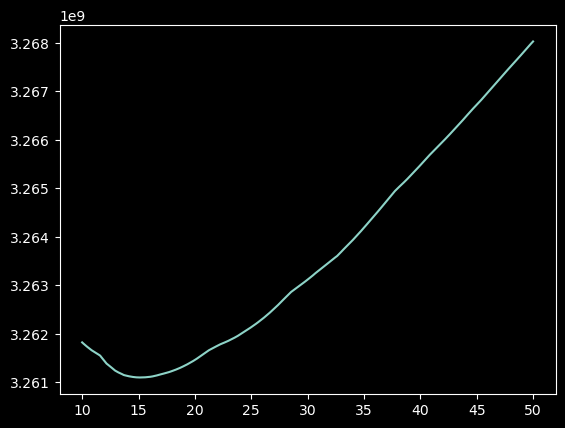

In [63]:
import matplotlib.pyplot as plt
# plt.scatter(y, lasso_pred)
plt.plot(lasso.alphas_, lasso.mse_path_.mean(axis=1))

In [64]:
lasso.alpha_

15.125125125125125